<a href="https://colab.research.google.com/github/joraj18/MNIST-Neural-Network-Model/blob/main/MNIST_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [28]:
(X_train, Y_train), (X_test, Y_test)=keras.datasets.mnist.load_data()

In [29]:
len(X_train)

60000

In [30]:
X_train[0].shape

(28, 28)

In [31]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

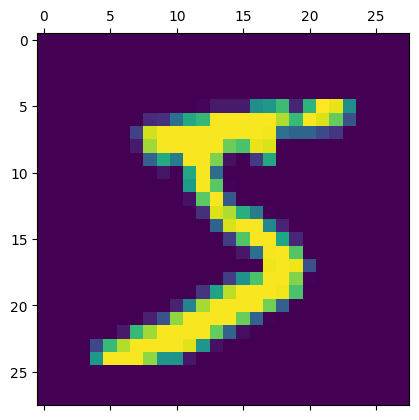

In [32]:
  plt.matshow(X_train[0])

In [33]:
X_train_flattened =X_train.reshape(len(X_train),28*28)
X_test_flattened =X_test.reshape(len(X_test),28*28)

In [34]:
X_train_flattened.shape

(60000, 784)

In [35]:
X_test_flattened.shape

(10000, 784)

In [36]:
X_train_flattened=X_train_flattened/255
X_test_flattened=X_test_flattened/255

In [37]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

In [38]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

In [39]:
model.fit(X_train_flattened, Y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4734 - accuracy: 0.8767
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3041 - accuracy: 0.9147
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2833 - accuracy: 0.9214
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2731 - accuracy: 0.9232
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2668 - accuracy: 0.9254


In [40]:
model.evaluate(X_test_flattened, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2683 - accuracy: 0.9248


[0.26827752590179443, 0.9247999787330627]

In [41]:
model.predict(np.array([X_test_flattened[1]]))

1/1 [==============================] - 0s 43ms/step


array([[4.1276899e-01, 3.5117920e-03, 9.9937314e-01, 4.4660583e-01,
        5.3337973e-10, 8.2015496e-01, 8.8824809e-01, 1.4462642e-12,
        1.6825698e-01, 1.2057279e-09]], dtype=float32)

In [42]:
y_predicted=model.predict(X_test_flattened)
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:10]

313/313 [==============================] - 0s 1ms/step


[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]

In [43]:
#confusion matrix
cm=tf.math.confusion_matrix(labels=Y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    1,    2,    0,    5,    3,    2,    1,    0],
       [   0, 1109,    3,    2,    0,    1,    4,    2,   14,    0],
       [   7,    8,  916,   20,    8,    4,   12,   12,   42,    3],
       [   3,    0,   19,  928,    0,   17,    2,   14,   21,    6],
       [   1,    1,    3,    1,  916,    0,   12,    5,   10,   33],
       [  10,    2,    2,   42,   11,  764,   16,    8,   31,    6],
       [  14,    3,    5,    2,    7,    9,  913,    2,    3,    0],
       [   1,    5,   21,    4,    8,    0,    0,  967,    4,   18],
       [   7,    6,    6,   26,    9,   23,    9,   14,  869,    5],
       [  11,    7,    1,   11,   29,    7,    0,   37,    6,  900]],
      dtype=int32)>

Text(50.722222222222214, 0.5, 'Truth')

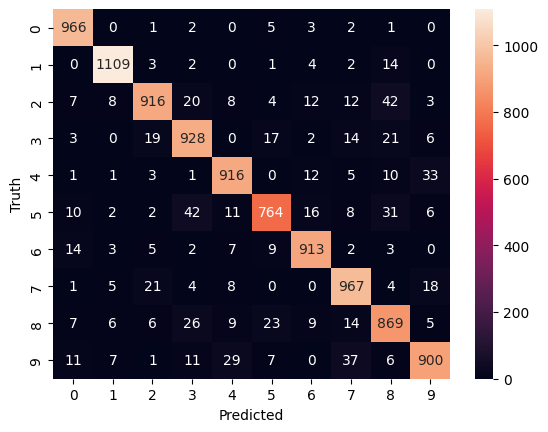

In [44]:
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [45]:
wrong_pred=[]
for i in range (1000):
  if y_predicted_labels[i]!=Y_test[i]:
    wrong_pred.append(i)
print(wrong_pred)

[8, 33, 63, 66, 73, 124, 149, 193, 195, 211, 233, 241, 247, 259, 290, 300, 318, 320, 321, 340, 352, 359, 362, 381, 412, 435, 444, 445, 448, 478, 479, 502, 507, 511, 531, 536, 542, 543, 551, 565, 569, 578, 583, 591, 613, 619, 627, 628, 629, 659, 684, 691, 692, 707, 717, 720, 728, 738, 740, 741, 760, 791, 829, 830, 839, 844, 857, 877, 881, 882, 898, 924, 938, 939, 947, 950, 951, 956, 965, 975, 982, 999]


Lable:  9
Predicted Value:  9


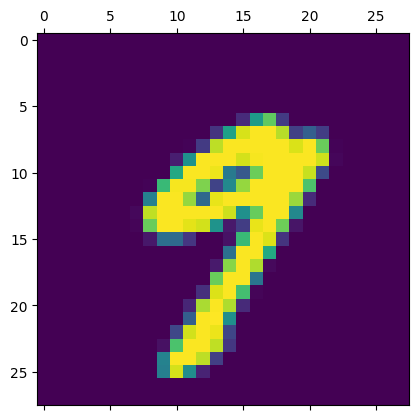

In [46]:
#trying to find where the nn couldnt able to predict correctly
i=20  #change values of i as diff values of the output list in the previous cell
print('Lable: ',Y_test[i])
print("Predicted Value: ", y_predicted_labels[i])
plt.matshow(X_test[i])

In [47]:
#model2

In [48]:
model2=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [49]:
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )


In [50]:
model2.fit(X_train, Y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.9316 - accuracy: 0.8696
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2258 - accuracy: 0.9372
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1684 - accuracy: 0.9528
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1363 - accuracy: 0.9605
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1226 - accuracy: 0.9654


In [51]:
model2.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1441 - accuracy: 0.9608


[0.14414077997207642, 0.9607999920845032]